In [ ]:
# !pip install kaggle
# !mkdir -p /root/.kaggle
# !mv kaggle.json /root/.kaggle/

In [ ]:
# !chmod 600 /root/.kaggle/kaggle.json


In [ ]:

# !kaggle datasets download -d gpiosenka/100-bird-species

In [ ]:
# !unzip /content/100-bird-species.zip -d /content/drive/MyDrive/birdsdataset

importing modules and libraries to be used in project

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plab
import seaborn as sns
import matplotlib.pyplot as plt
#computer vision module opencv
import cv2
#glob to save same types of files
# from glob import glob


In [6]:
categories=['QUETZAL','CANARY','CROW','PINK ROBIN','PEACOCK','VIOLET BACKED STARLING','PUFFIN','FLAME BOWERBIRD','HAWFINCH','SNOWY OWL']

In [10]:
import os
folder_path = '/content/drive/MyDrive/birdsdataset/train'
cat_count=[]
for cat in categories:
    files_list = len(os.listdir(os.path.join(folder_path,cat)))
    print(f"Number of files in the {cat}:{files_list}")
    cat_count.append(files_list)


Number of files in the QUETZAL:152
Number of files in the CANARY:160
Number of files in the CROW:163
Number of files in the PINK ROBIN:154
Number of files in the PEACOCK:156
Number of files in the VIOLET BACKED STARLING:174
Number of files in the PUFFIN:166
Number of files in the FLAME BOWERBIRD:162
Number of files in the HAWFINCH:167
Number of files in the SNOWY OWL:161


collecting data of birds and choosing 10 such categories to work on smaller dataset and understanding the process in meantime.

# **EDA**

checking class imbalance

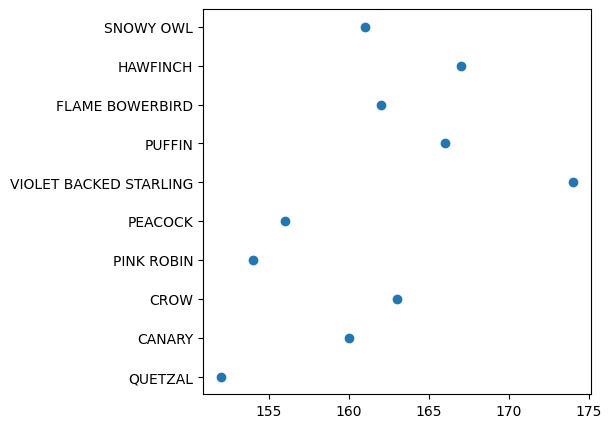

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(x=cat_count,y=categories)
plt.savefig('class_imbalance.png')

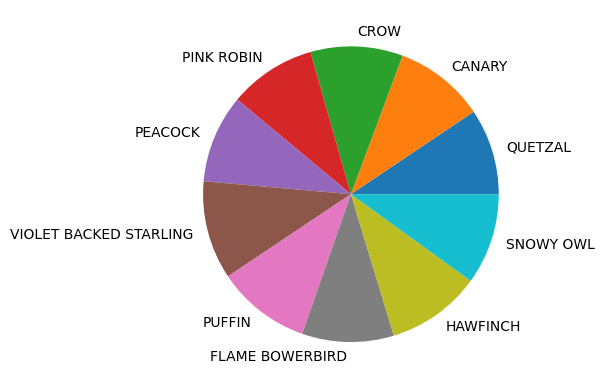

In [ ]:
plt.pie(cat_count,labels=categories,)
plt.show()

exploring images

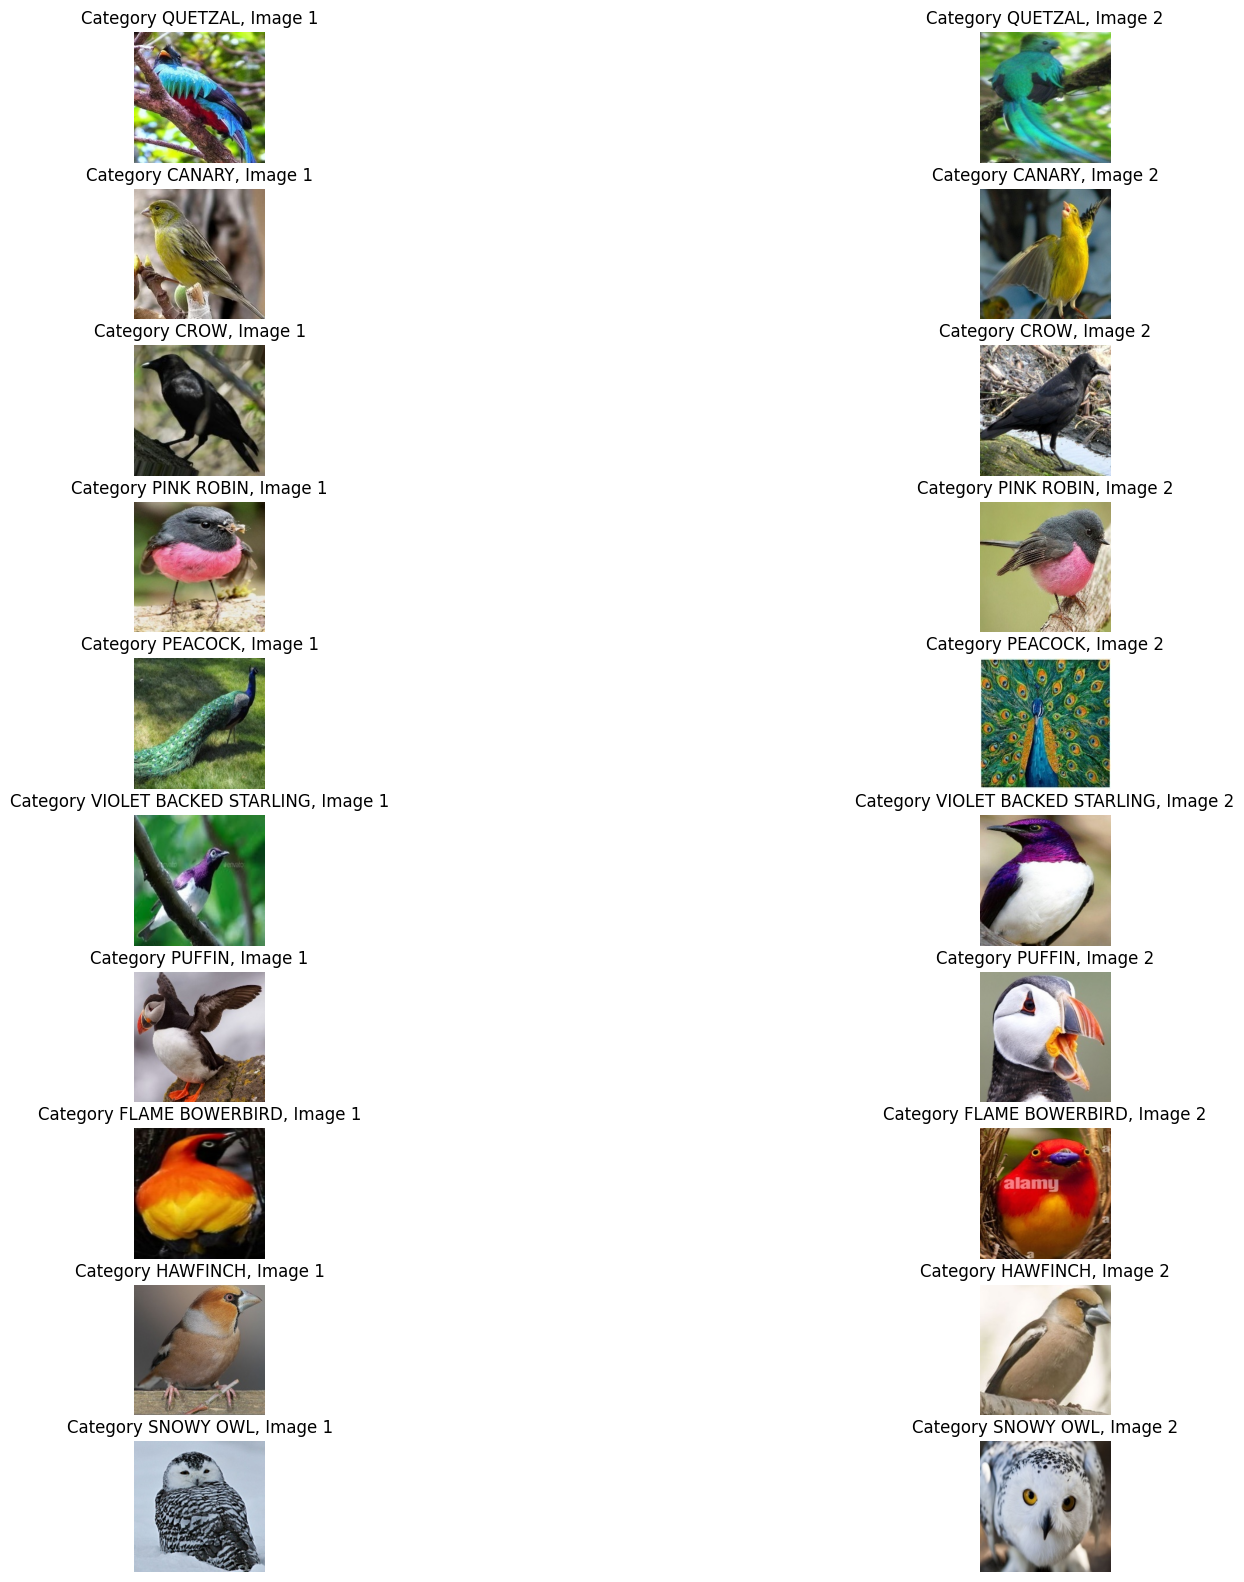

In [ ]:
num_images_per_category = 2
num_categories = len(categories)

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_categories, num_images_per_category, figsize=(20,20))

# Loop through each category
for i in range(num_categories):

    # Loop through each image in the category
    count = 0
    for j in os.listdir(os.path.join(folder_path, categories[i])):
        if count >= num_images_per_category:
            break

        # loading image
        image_data = plab.imread(os.path.join(folder_path, categories[i], j))

        # Plot the image on the corresponding subplot
        axes[i, count].imshow(image_data)
        axes[i, count].axis('off')  # Turn off axis labels

        # Optionally, you can set a title for each subplot
        axes[i, count].set_title(f'Category {categories[i]}, Image {count + 1}')

        # Increment count
        count += 1



# Show the plot
plt.show()

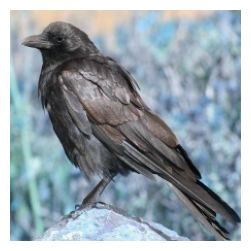

In [ ]:
p_img = cv2.imread('/content/drive/MyDrive/birdsdataset/train/CROW/051.jpg')
fig ,ax=plab.subplots(figsize=(4,3))
ax.imshow(p_img)
ax.axis('off')
plab.show()


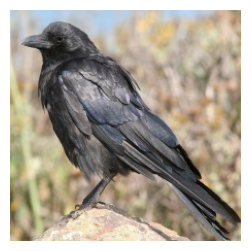

In [ ]:

# Convert BGR to RGB
img_rgb = cv2.cvtColor(p_img, cv2.COLOR_BGR2RGB)
fig ,ax=plab.subplots(figsize=(4,3))
ax.imshow(img_rgb)
ax.axis('off')
plab.show()

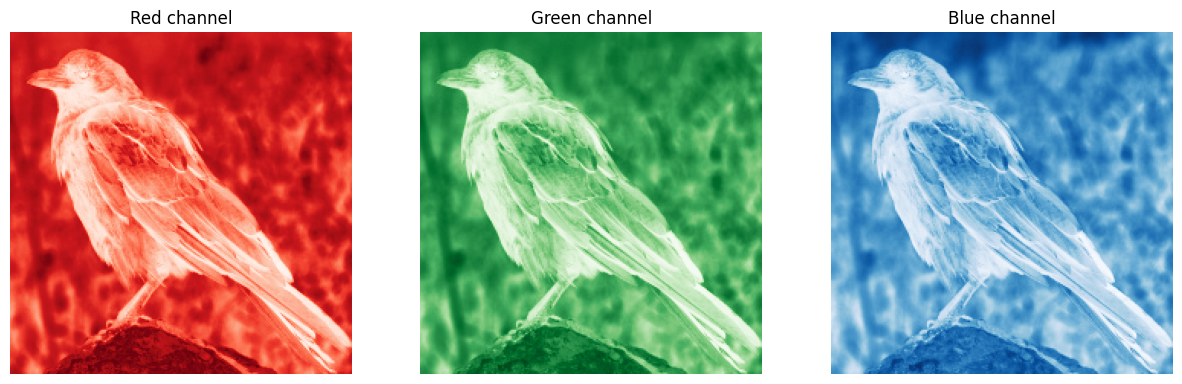

In [ ]:
# Display RGB Channels of our image
fig, axs = plab.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_rgb[:,:,0], cmap='Reds')
axs[1].imshow(img_rgb[:,:,1], cmap='Greens')
axs[2].imshow(img_rgb[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plab.show()

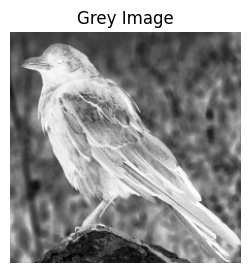

In [ ]:
gray_img = cv2.cvtColor(p_img, cv2.COLOR_BGR2GRAY)
fig, ax = plab.subplots(figsize=(4, 3))
ax.imshow(gray_img, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plab.show()

In [ ]:
# Sharpen Image
def sharpen_img(img):
  kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,10,-1],
                              [-1,-1,-1]])
  sharpened = cv2.filter2D(img, -1, kernel_sharpening)
  return sharpened
def blur_img(img):
  kernel_3x3 = np.ones((3, 3), np.float32) / 9
  blurred = cv2.filter2D(img, -1, kernel_3x3)
  return blurred


now clubbing important files together in a variable

In [11]:
from skimage.transform import resize

In [ ]:
all_bird_images=[]
all_bird_type=[]
train_folder_path='/content/drive/MyDrive/birdsdataset/train'
c=0
for i in range(len(categories)):
  for j in os.listdir(os.path.join(train_folder_path,categories[i])):
    #reading using plab to to get rgb images rather than bgr
    img=plab.imread(train_folder_path+'/'+categories[i]+'/'+j)

    #resizing images
    image_resized = resize(
    img, (128 , 128),)

    all_bird_images.append(image_resized)
    all_bird_type.append(c)
  c+=1
  print(c)

1
2
3
4
5
6
7
8
9
10


In [ ]:
#saving images
# plab.imsave('sharp_alba_p.png', sharpened)
# sharpened_rgb=cv2.cvtColor(sharpened,cv2.COLOR_RGB2BGR)
# cv2.imwrite('shar_alba_cv.png', sharpened_rgb)#returns true since img was saved

In [ ]:
# # rectangular_mask
# mask = np.zeros(cv_img.shape[:2], dtype="uint8")
# cv2.rectangle(mask, (0, 90), (290, 450), 255, -1)
# plab.imshow(mask)
# masked = cv2.bitwise_and(cv_img, cv_img, mask=mask)
# plab.imshow(masked)

In [ ]:
# # circular_mask
# mask = np.zeros(cv_img.shape[:2], dtype="uint8")
# cv2.circle(mask, (145, 200), 100, 255, -1)
# plab.imshow(mask)
# masked = cv2.bitwise_and(cv_img, cv_img, mask=mask)
# plab.imshow(masked)

label encoding categories by changing categorical columns to numerical columns for better model performance

In [18]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit label encoder and transform categories into integer labels
encoded_labels = label_encoder.fit_transform(categories)


# Create a dictionary to map encoded labels to their corresponding bird types
label_mapping = {categories[label]: label for label in encoded_labels}

# Print the mapping
print(label_mapping)



{'FLAME BOWERBIRD': 7, 'QUETZAL': 0, 'CANARY': 1, 'VIOLET BACKED STARLING': 5, 'PEACOCK': 4, 'SNOWY OWL': 9, 'PUFFIN': 6, 'CROW': 2, 'PINK ROBIN': 3, 'HAWFINCH': 8}


In [ ]:
mapped_types = [label_mapping.get(item, item) for item in all_bird_type]

In [ ]:
print(mapped_types)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [ ]:
#to control shape of the array converting into numpy array
all_bird_images=np.array(all_bird_images)
all_bird_type=np.array(all_bird_type)

In [ ]:
all_bird_images[1]

array([[[0.39016725, 0.4435294 , 0.39642007],
        [0.5210157 , 0.58662653, 0.50865315],
        [0.58149237, 0.66380444, 0.53927316],
        ...,
        [0.70148487, 0.91378435, 0.59378627],
        [0.6587828 , 0.8876651 , 0.5012647 ],
        [0.61766145, 0.86398172, 0.43620743]],

       [[0.37892378, 0.42032383, 0.41959478],
        [0.5311033 , 0.57887017, 0.56886795],
        [0.64456034, 0.71208647, 0.66550982],
        ...,
        [0.60038263, 0.85759175, 0.45478459],
        [0.5820882 , 0.84905968, 0.38153708],
        [0.55462651, 0.8288218 , 0.31436908]],

       [[0.39693564, 0.42928198, 0.40300665],
        [0.51539092, 0.55183728, 0.54343934],
        [0.64797051, 0.68703639, 0.70003859],
        ...,
        [0.51068857, 0.80595195, 0.29449759],
        [0.52161388, 0.81463202, 0.25955394],
        [0.50367163, 0.79975194, 0.21925603]],

       ...,

       [[0.22405678, 0.23580994, 0.15729255],
        [0.20862529, 0.21877966, 0.15412828],
        [0.19361228, 0

The data is already standardized to the range [0, 1],so there's no need for additional standardization or normalization.

In [ ]:
all_bird_images.shape

(1615, 128, 128, 3)

In [ ]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(all_bird_images,all_bird_type,test_size=0.2,shuffle=True,stratify=all_bird_type)

In [ ]:
train_x.shape

(1292, 128, 128, 3)

applying CNN using Tensorflow

After many careful considerations and multiple experimentation i decided on this architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(len(categories), activation='softmax')
])


In [ ]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


In [ ]:
#to prevent overfitting
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(train_x, train_y, epochs=20,validation_data=(test_x, test_y),callbacks=[early_stopping])

Epoch 1/20
41/41 [==============================] - 51s 1s/step - loss: 2.2747 - accuracy: 0.2469 - val_loss: 1.8869 - val_accuracy: 0.4025
Epoch 2/20
41/41 [==============================] - 54s 1s/step - loss: 1.7009 - accuracy: 0.4474 - val_loss: 1.5579 - val_accuracy: 0.5511
Epoch 3/20
41/41 [==============================] - 53s 1s/step - loss: 1.4311 - accuracy: 0.5658 - val_loss: 1.3384 - val_accuracy: 0.6966
Epoch 4/20
41/41 [==============================] - 49s 1s/step - loss: 1.2085 - accuracy: 0.6827 - val_loss: 1.0685 - val_accuracy: 0.7678
Epoch 5/20
41/41 [==============================] - 48s 1s/step - loss: 1.0820 - accuracy: 0.7245 - val_loss: 0.9017 - val_accuracy: 0.8638
Epoch 6/20
41/41 [==============================] - 50s 1s/step - loss: 0.9343 - accuracy: 0.7817 - val_loss: 0.8346 - val_accuracy: 0.8359
Epoch 7/20
41/41 [==============================] - 48s 1s/step - loss: 0.8258 - accuracy: 0.8119 - val_loss: 0.7146 - val_accuracy: 0.8762
Epoch 8/20
41/41 [==

checking model accuracy

11/11 - 2s - loss: 0.7146 - accuracy: 0.8762 - 2s/epoch - 171ms/step
0.8761609792709351


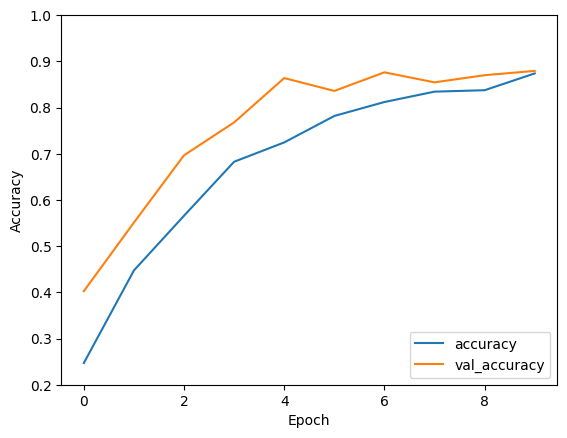

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)

print(test_acc)


saving the model

In [ ]:
model.save('/content/drive/MyDrive/birdsdataset/my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/birdsdataset/my_model.h5')

**testing** the model

In [8]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/birdsdataset/my_model.h5')




In [ ]:
!pip show tensorflow


Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [14]:
import os
folder_path_1='/content/drive/MyDrive/birdsdataset/test'
folder_path_2='/content/drive/MyDrive/birdsdataset/valid'

test_bird_files=[]
test_bird_type=[]
for cat in categories:
    for j in os.listdir(os.path.join(folder_path_1,cat)):
      img=plab.imread(folder_path_1+'/'+cat+'/'+j)
      image_resized = resize(img, (128 , 128,3))
      test_bird_files.append(image_resized)
      test_bird_type.append(cat)
    for j in os.listdir(os.path.join(folder_path_2,cat)):
      img=plab.imread(folder_path_2+'/'+cat+'/'+j)
      image_resized = resize(img, (128 , 128,3))
      test_bird_files.append(image_resized)
      test_bird_type.append(cat)



Taking random images to check the model

In [15]:
# Assuming test_bird_files and test_bird_type are NumPy arrays
combined = list(zip(test_bird_files, test_bird_type))
np.random.shuffle(combined)
test_bird_files_shuffled, test_bird_type_shuffled = zip(*combined)

# Convert back to NumPy arrays if needed
test_bird_files_shuffled = np.array(test_bird_files_shuffled)
test_bird_type_shuffled = np.array(test_bird_type_shuffled)


In [16]:
# Convert back to NumPy arrays
test_bird_files = np.array(test_bird_files_shuffled)
mapped_types = np.array(test_bird_type_shuffled)

In [20]:
mapped_types = [label_mapping.get(item, item) for item in mapped_types]

In [21]:
preds=model.predict(test_bird_files)


4/4 [==============================] - 1s 162ms/step


In [22]:
predicted_class_index = np.argmax(preds)

In [23]:
correct=0
prediction=[]
for i in range(len(preds)):
  predicted_class_index = np.argmax(preds[i])
  prediction.append(predicted_class_index)
  print(f'predicted:{categories[predicted_class_index]} '+'\n'+f'actual:{categories[mapped_types[i]]}')
  if mapped_types[i]==predicted_class_index:
    correct+=1


predicted:PEACOCK 
actual:PEACOCK
predicted:PUFFIN 
actual:PUFFIN
predicted:PINK ROBIN 
actual:PINK ROBIN
predicted:CANARY 
actual:CANARY
predicted:SNOWY OWL 
actual:SNOWY OWL
predicted:PEACOCK 
actual:PEACOCK
predicted:FLAME BOWERBIRD 
actual:FLAME BOWERBIRD
predicted:FLAME BOWERBIRD 
actual:FLAME BOWERBIRD
predicted:VIOLET BACKED STARLING 
actual:VIOLET BACKED STARLING
predicted:VIOLET BACKED STARLING 
actual:VIOLET BACKED STARLING
predicted:CANARY 
actual:CANARY
predicted:VIOLET BACKED STARLING 
actual:VIOLET BACKED STARLING
predicted:CANARY 
actual:CANARY
predicted:PUFFIN 
actual:PUFFIN
predicted:VIOLET BACKED STARLING 
actual:VIOLET BACKED STARLING
predicted:CANARY 
actual:CANARY
predicted:SNOWY OWL 
actual:SNOWY OWL
predicted:HAWFINCH 
actual:HAWFINCH
predicted:FLAME BOWERBIRD 
actual:FLAME BOWERBIRD
predicted:PEACOCK 
actual:PEACOCK
predicted:SNOWY OWL 
actual:SNOWY OWL
predicted:HAWFINCH 
actual:HAWFINCH
predicted:SNOWY OWL 
actual:SNOWY OWL
predicted:PUFFIN 
actual:PUFFIN
pred

In [31]:

print("Total Accuracy for validation:",correct/len(preds)*100)

Total Accuracy for validation: 94.0


In [32]:
from sklearn.metrics import classification_report

# Assuming you already have 'mapped_types' and 'prediction' variables defined

# Generate classification report
report = classification_report(mapped_types, prediction)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.83      1.00      0.91        10
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00        10
           5       0.90      0.90      0.90        10
           6       1.00      0.70      0.82        10
           7       1.00      1.00      1.00        10
           8       0.82      0.90      0.86        10
           9       1.00      1.00      1.00        10

    accuracy                           0.94       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.95      0.94      0.94       100



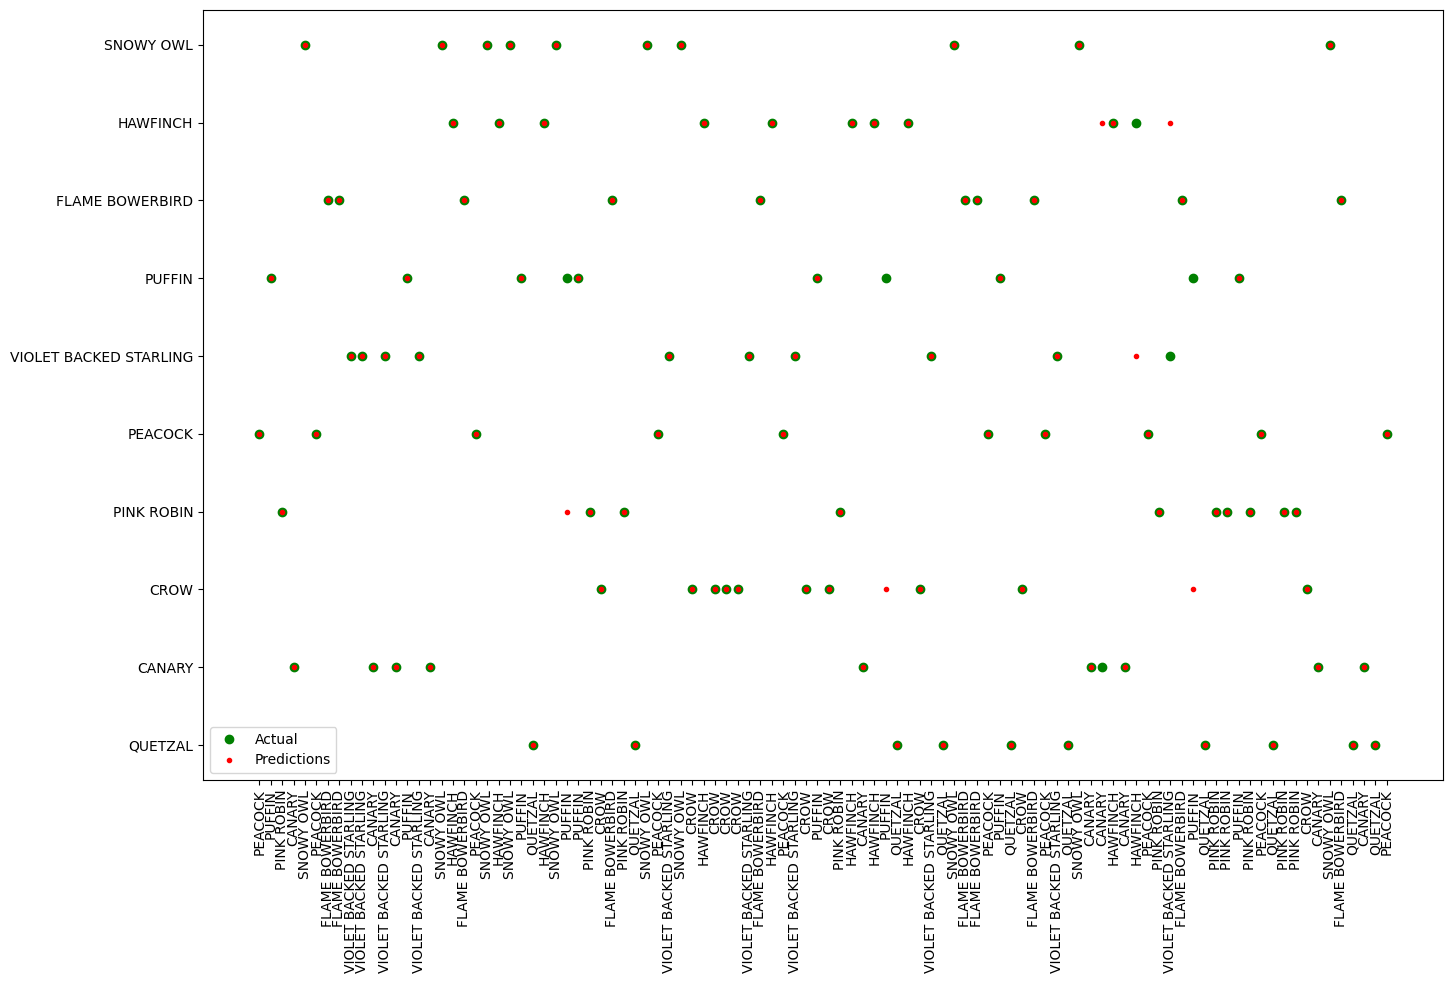

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
# Plot the mapped types
plt.plot(mapped_types, 'go', label='Actual')
# Plot the predictions
plt.plot(prediction, 'r.', label='Predictions')
# Set axis labels
plt.xticks(range(len(mapped_types)), [categories[i] for i in mapped_types], rotation=90)
plt.yticks(range(len(categories)), categories)
# Add legend
plt.legend()
# Show plot
plt.show()


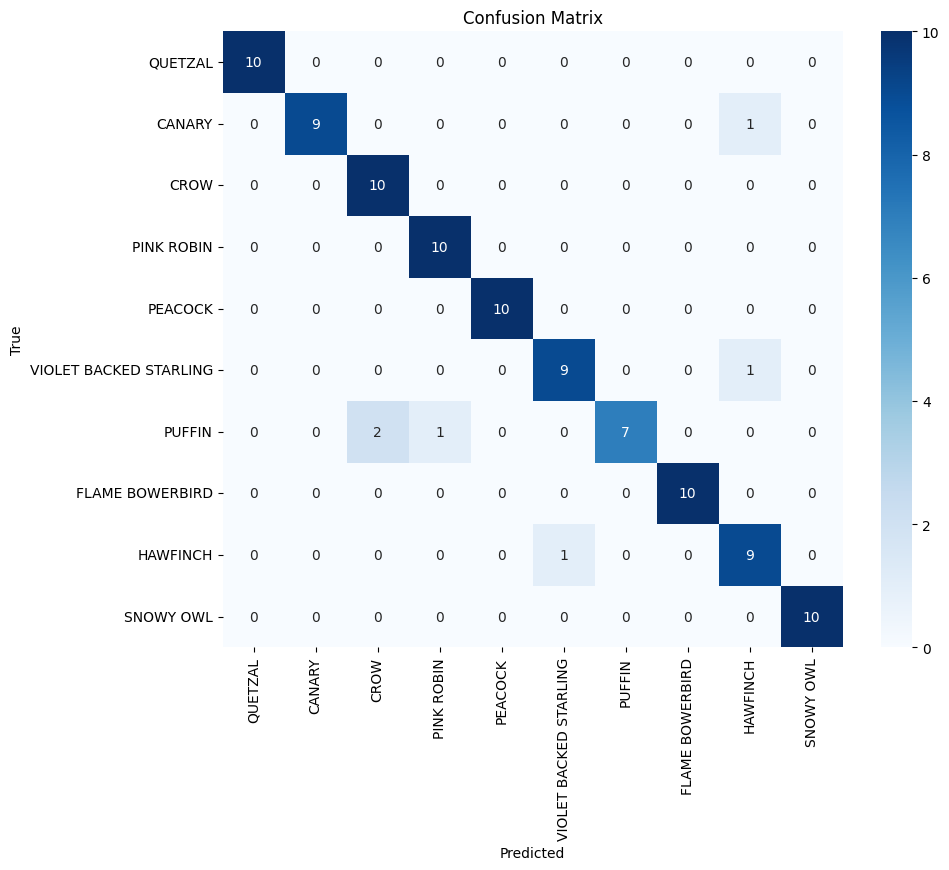

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Generating confusion matrix
cm = confusion_matrix(mapped_types,prediction)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

taking a random image from internet and predicting results

In [28]:
import requests
from PIL import Image
from io import BytesIO


url1 = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Corvus_corone_-near_Canford_Cliffs%2C_Poole%2C_England-8.jpg/800px-Corvus_corone_-near_Canford_Cliffs%2C_Poole%2C_England-8.jpg"
url2 = "https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcT1xTwbqcfdQkN80m-BuqB6EOtOUMa2eFdoh1fx3JZeE8ToY42f"
url3 = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Peacock_by_Nihal_jabin.jpg/220px-Peacock_by_Nihal_jabin.jpg"
url4 = "https://i.pinimg.com/1200x/a9/36/fb/a936fb13f94acf706d1cf23c3c2c0b3e.jpg"
url5 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTuRJGH4p7UmgM5F2DZwa92IFSTaAmQ01ECVHyIKnV9vA&s"

urls = [url1, url2, url3, url4, url5]
cat=['CROW','SNOWY OWL','PEACOCK','PINK ROBIN','VIOLET BACKED STARLING']
internet_images = []
for url in urls:
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    image = image.resize((128, 128))
    internet_images.append(image)

# Convert the list of resized PIL images to a NumPy array
i_i = np.array([np.array(image) for image in internet_images])/255

i_i[0]

array([[[0.85098039, 0.71764706, 0.44313725],
        [0.80392157, 0.68235294, 0.41960784],
        [0.78823529, 0.67843137, 0.43529412],
        ...,
        [0.91372549, 0.85098039, 0.77647059],
        [0.92941176, 0.86666667, 0.75294118],
        [0.92941176, 0.8627451 , 0.74117647]],

       [[0.82745098, 0.70196078, 0.47058824],
        [0.78823529, 0.6745098 , 0.45098039],
        [0.78039216, 0.6745098 , 0.44705882],
        ...,
        [0.85098039, 0.80392157, 0.7372549 ],
        [0.8745098 , 0.81568627, 0.70196078],
        [0.89019608, 0.81960784, 0.68627451]],

       [[0.78039216, 0.66666667, 0.46666667],
        [0.75294118, 0.64705882, 0.43921569],
        [0.76470588, 0.65882353, 0.44313725],
        ...,
        [0.80784314, 0.78823529, 0.72156863],
        [0.84313725, 0.8       , 0.69411765],
        [0.8627451 , 0.8       , 0.67058824]],

       ...,

       [[0.74901961, 0.77647059, 0.80392157],
        [0.74509804, 0.77254902, 0.80392157],
        [0.7372549 , 0

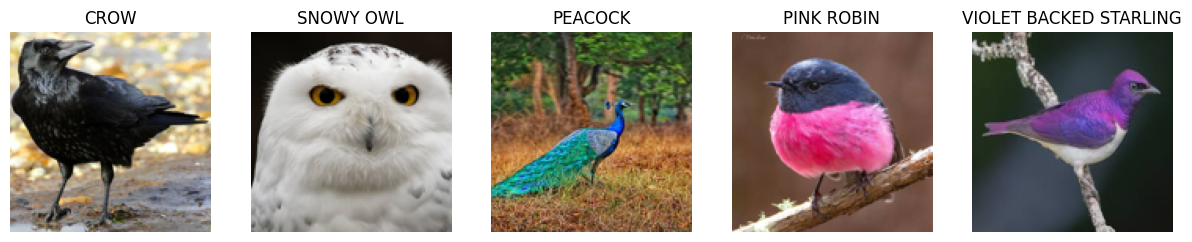

In [29]:
# Plot the images
plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(internet_images[i])
    plt.axis('off')
    plt.title('{}'.format(cat[i]))

plt.show()

In [30]:
count=0
for img_array in i_i:
    # Reshaping the image array to (1, height, width, channels) for prediction
    img_array = img_array.reshape((1,) + img_array.shape)
    # predicting
    pred_bird = model.predict(img_array)
    predicted_class_index = np.argmax(pred_bird)
    # printing result
    print(f'Predicted: {categories[predicted_class_index]}\nActual: {cat[count]}')
    count+=1


1/1 [==============================] - 0s 38ms/step
Predicted: CROW
Actual: CROW
1/1 [==============================] - 0s 32ms/step
Predicted: SNOWY OWL
Actual: SNOWY OWL
1/1 [==============================] - 0s 25ms/step
Predicted: PEACOCK
Actual: PEACOCK
1/1 [==============================] - 0s 35ms/step
Predicted: PINK ROBIN
Actual: PINK ROBIN
1/1 [==============================] - 0s 29ms/step
Predicted: VIOLET BACKED STARLING
Actual: VIOLET BACKED STARLING
